(2866, 2944)


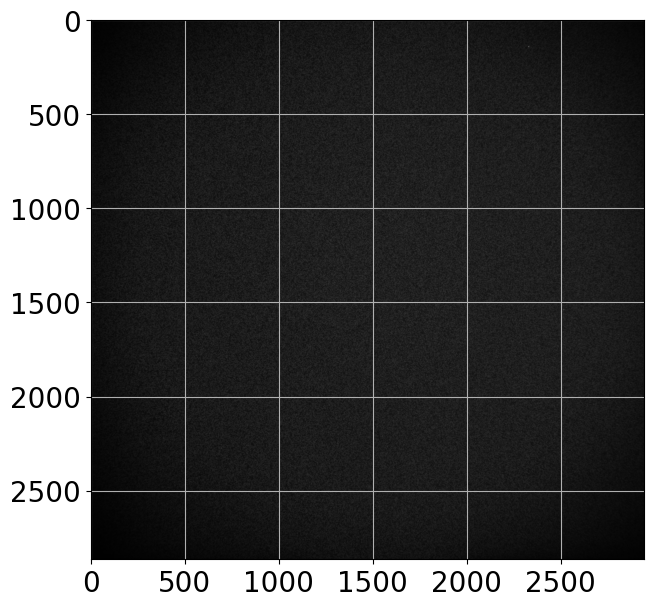

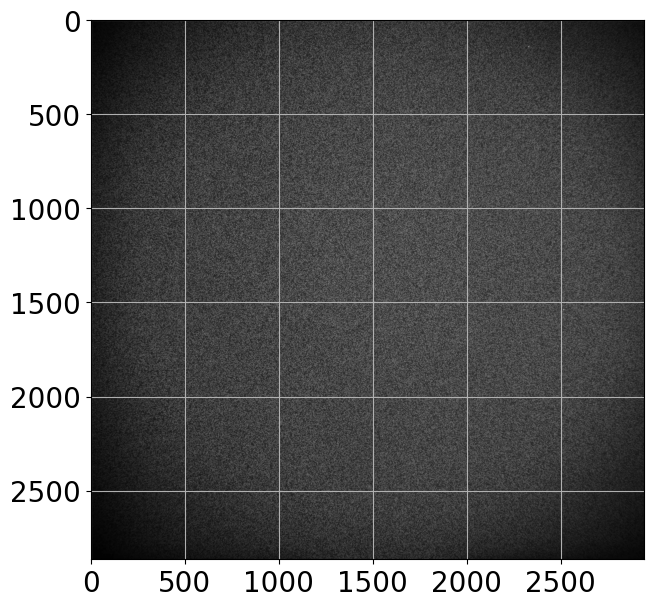

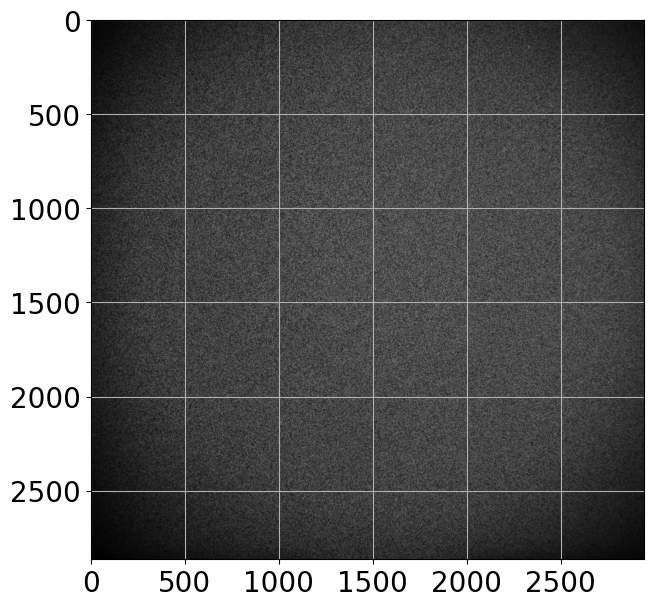

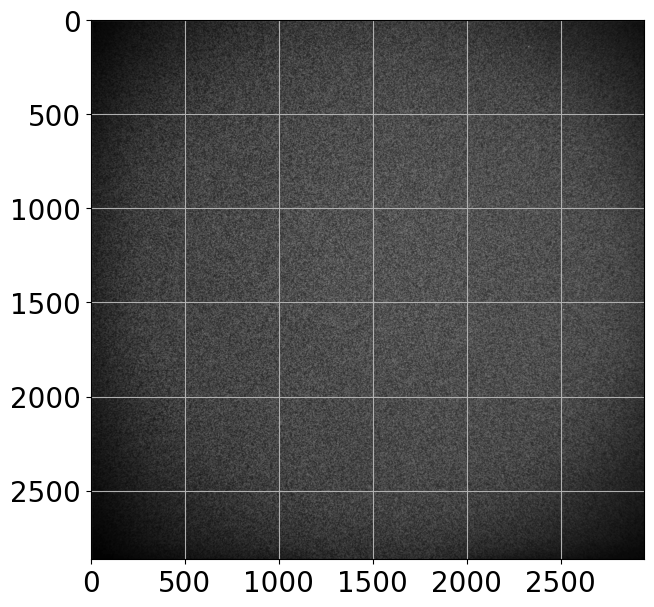

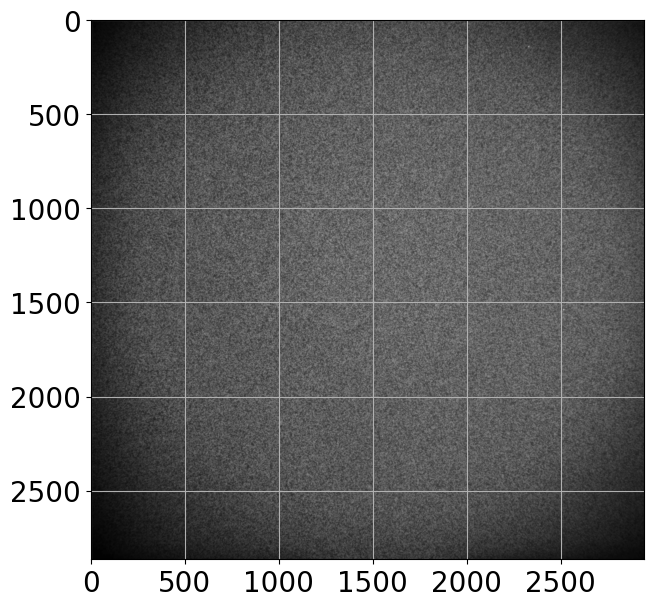

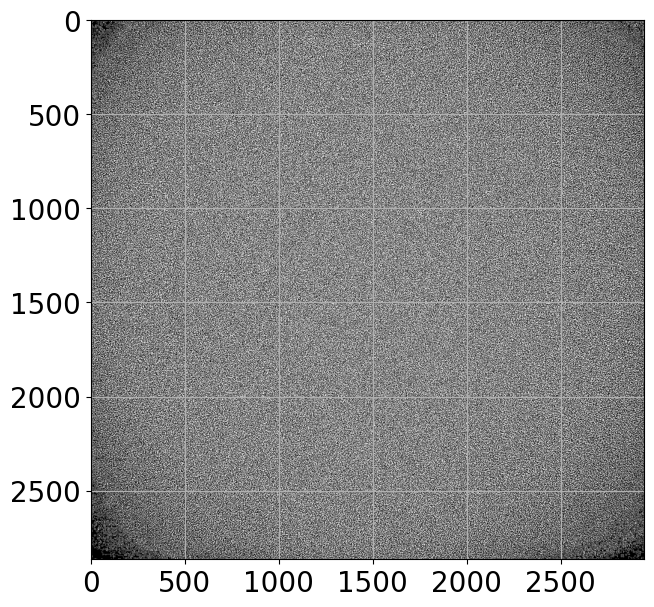

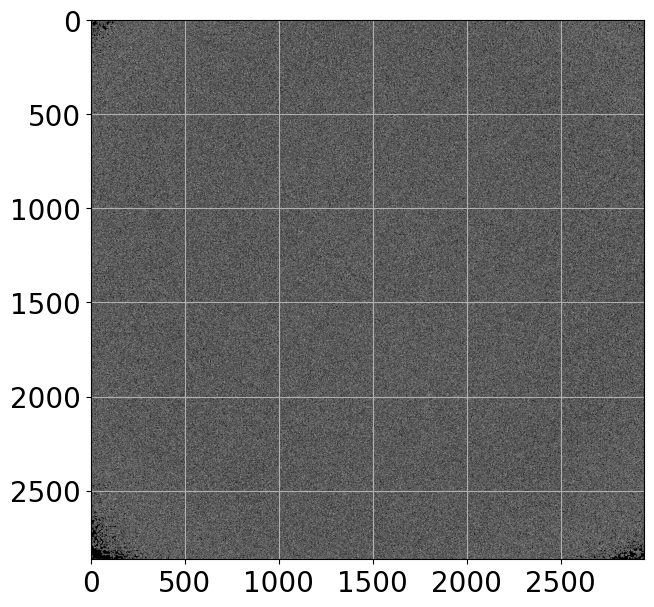

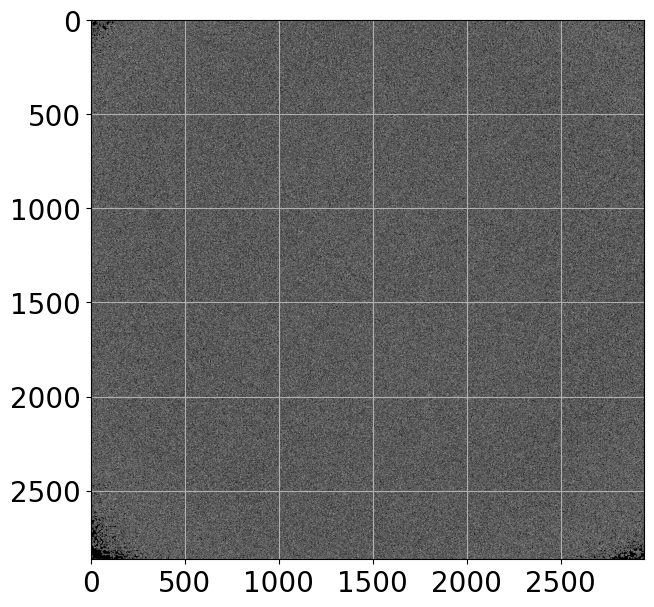

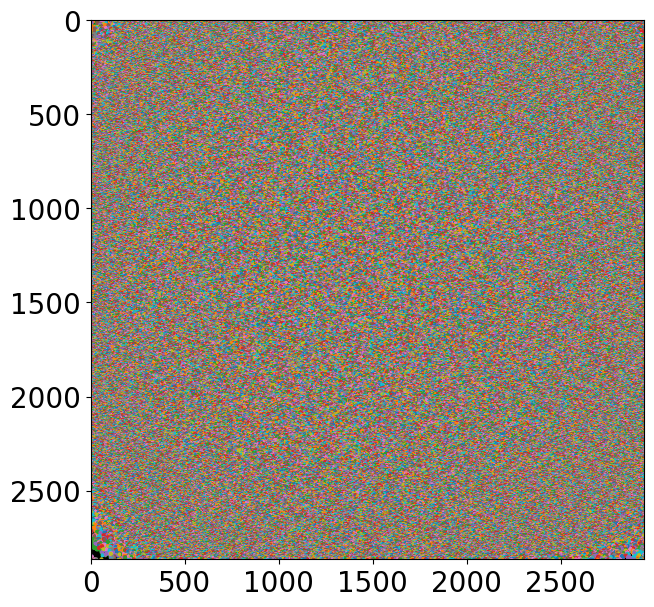

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#from libtiff import TIFF
from skimage import io
#import pytiff
from tifffile import tifffile
#import OpenImageIO as oiio
#import rasterio
#import tensorflow_io as tfio
import cv2
import scipy
from skimage import color, data, restoration
from scipy.signal import convolve2d
import sporco
import skimage 
from scipy import ndimage
from skimage import measure



import numpy as np
from numpy.fft import fft2, ifft2

def wiener_filter(img, kernel, K = 10):
    dummy = np.copy(img)
    kernel = np.pad(kernel, [(0, dummy.shape[0] - kernel.shape[0]), (0, dummy.shape[1] - kernel.shape[1])], 'constant')
    # Fourier Transform
    dummy = fft2(dummy)
    kernel = fft2(kernel)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return np.uint8(dummy)

def main():
    image = cv2.imread("C:/Users/evgen/Downloads/s_1_1102_c.jpg",0)
    #image=scipy.signal.wiener(image)
    print(image.shape)
    plt.figure(figsize=(15,7))
    plt.imshow(image,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    kernel = np.array([[0, -1, 0], [-1, 6.5, -1], [0, -1, 0]])
  

    image = cv2.filter2D(image, -1, kernel)
    plt.figure(figsize=(15,7))
    plt.imshow(image,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    img = cv2.GaussianBlur(image,(3,3),0)
    
    plt.figure(figsize=(15,7))
    plt.imshow(img,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    
    img= cv2.medianBlur(img,3)
    plt.figure(figsize=(15,7))
    plt.imshow(img,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    
    slp,hlp=sporco.signal.tikhonov_filter(image,2)
    plt.figure(figsize=(15,7))
    
    plt.imshow(slp,cmap = 'gray')
    
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    plt.figure(figsize=(15,7))
    
    plt.imshow(hlp,cmap = 'gray')
    
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    edges = cv2.Canny(image=hlp, threshold1=100, threshold2=200) 
    plt.figure(figsize=(15,7))
    
    plt.imshow(edges,cmap = 'gray')
    
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    
    ret, thresh = cv2.threshold(edges, 1, 2, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    plt.figure(figsize=(15,7))
    plt.imshow(thresh,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    
    # Find contours at a constant value of 0.05
    contours = measure.find_contours(hlp, 0.05)

    # Display the image and plot all contours found
    fig, ax = plt.subplots(figsize=(15,7))
    ax.imshow(hlp, cmap=plt.cm.gray)

    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
        ax.grid(True)
        ax.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    plt.show()
    
    
        
    
    
if __name__ == "__main__":
    main()